# New York City Taxi Trip Duration - [link](https://www.kaggle.com/competitions/nyc-taxi-trip-duration)
- type: Regression
- score: RMSE

[EDA notebook](https://www.kaggle.com/code/headsortails/nyc-taxi-eda-update-the-fast-the-curious#external-data)
___

File descriptions
- `train.csv` - the training set (contains 1458644 trip records)
- `test.csv` - the testing set (contains 625134 trip records)
- `sample_submission.csv` - a sample submission file in the correct format_



**Features**
- `id` - a unique identifier for each trip
- `vendor_id` - a code indicating the provider associated with the trip record
- `pickup_datetime` - date and time when the meter was engaged
- `dropoff_datetime` - date and time when the meter was disengaged
- `passenger_count` - the number of passengers in the vehicle (driver entered value)
- `pickup_longitude` - the longitude where the meter was engaged
- `pickup_latitude` - the latitude where the meter was engaged
- `dropoff_longitude` - the longitude where the meter was disengaged
- `dropoff_latitude` - the latitude where the meter was disengaged
- `store_and_fwd_flag` - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip

Target
- `trip_duration` - duration of the trip in seconds

**We are interested in everything that affects our `trip duration`**

## 1. Loading data + checking

In [2]:
import os
import shutil
import pandas as pd
import numpy as np
from IPython.display import display, Markdown
import calendar

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.3f}'.format)

import random
DEFAULT_RANDOM_SEED = 2021
def set_all_seeds(seed=DEFAULT_RANDOM_SEED):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
set_all_seeds(seed=DEFAULT_RANDOM_SEED)

os.chdir('C:/_Github repositories/New-York-City-Taxi-Trip-Duration')

In [3]:
train = pd.read_csv('data/train.csv')
display(train.head())
train.describe()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982,40.768,-73.965,40.766,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980,40.739,-73.999,40.731,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979,40.764,-74.005,40.710,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010,40.720,-74.012,40.707,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973,40.793,-73.973,40.783,N,435


,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1458644.000,1458644.000,1458644.000,1458644.000,1458644.000,1458644.000,1458644.000
mean,1.535,1.665,-73.973,40.751,-73.973,40.752,959.492
std,0.499,1.314,0.071,0.033,0.071,0.036,5237.432
min,1.000,0.000,-121.933,34.360,-121.933,32.181,1.000
25%,1.000,1.000,-73.992,40.737,-73.991,40.736,397.000
50%,2.000,1.000,-73.982,40.754,-73.980,40.755,662.000
75%,2.000,2.000,-73.967,40.768,-73.963,40.770,1075.000
max,2.000,9.000,-61.336,51.881,-61.336,43.921,3526282.000


In [4]:
test = pd.read_csv('data/test.csv')
display(test.head())
test.describe()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.988,40.732,-73.990,40.757,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.964,40.680,-73.960,40.655,N
2,id1217141,1,2016-06-30 23:59:47,1,-73.997,40.738,-73.986,40.730,N
3,id2150126,2,2016-06-30 23:59:41,1,-73.956,40.772,-73.986,40.730,N
4,id1598245,1,2016-06-30 23:59:33,1,-73.970,40.761,-73.962,40.756,N


,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
count,625134.000,625134.000,625134.000,625134.000,625134.000,625134.000
mean,1.535,1.662,-73.974,40.751,-73.973,40.752
std,0.499,1.311,0.073,0.030,0.073,0.036
min,1.000,0.000,-121.933,37.390,-121.933,36.601
25%,1.000,1.000,-73.992,40.737,-73.991,40.736
50%,2.000,1.000,-73.982,40.754,-73.980,40.755
75%,2.000,2.000,-73.967,40.768,-73.963,40.770
max,2.000,9.000,-69.249,42.815,-67.497,48.858


- **2 vendor IDs total (maybe analyze separatly)**
- **coordinates features**
- **passenger count (moth max 9 test/train)**
- **time feature (requires work)**
- **flag (info sent immediately or no) - possible to find "bad internet areas"**

test doesn't have 2 columns `trip_duration` and `dropoff_time`

### Missing values test
- **everything alright**

In [5]:
train.isna().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [6]:
test.isna().sum()

id                    0
vendor_id             0
pickup_datetime       0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
dtype: int64

### Combining `test` and `train` (for consistency checks)

In [7]:
df = pd.concat([train, test], ignore_index=True)
display(df.head())
df.isna().sum()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982,40.768,-73.965,40.766,N,455.000
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980,40.739,-73.999,40.731,N,663.000
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979,40.764,-74.005,40.710,N,2124.000
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010,40.720,-74.012,40.707,N,429.000
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973,40.793,-73.973,40.783,N,435.000


id                         0
vendor_id                  0
pickup_datetime            0
dropoff_datetime      625134
passenger_count            0
pickup_longitude           0
pickup_latitude            0
dropoff_longitude          0
dropoff_latitude           0
store_and_fwd_flag         0
trip_duration         625134
dtype: int64

### Feature type change
- date do `datetime`
- `vendor_id` and `passenger_count` to categorical

In [8]:
train['pickup_datetime'] = pd.to_datetime(train['pickup_datetime'])
train['dropoff_datetime'] = pd.to_datetime(train['dropoff_datetime'])

train['vendor_id'] = train['vendor_id'].astype('category')
train['passenger_count'] = train['passenger_count'].astype('category')

train['date']  = train['pickup_datetime'].dt.date
train['hour'] = train['pickup_datetime'].dt.hour

# Need ordered date (for plots)
train['wday'] = (
    train['pickup_datetime']
       .dt.strftime('%a')  
       .astype(pd.CategoricalDtype(calendar.day_abbr[0:], ordered=True))
)


train['month'] = train['pickup_datetime'] \
    .dt.strftime('%b') \
    .astype(pd.CategoricalDtype(calendar.month_abbr[0:], ordered=True))

### Checking whether or not `trip duration` calculated poorly
- **everything is alright**

In [9]:
interval_seconds = (train['dropoff_datetime'] - train['pickup_datetime']).dt.total_seconds()
print((np.abs(interval_seconds - train['trip_duration']) > 0).sum())

0


## 2. Features visualization
- NYC map (folium)

In [10]:
# import folium

# # Sample 8000 random rows from your DataFrame (train)
# foo = train.sample(n=8000, random_state=1234)

# # Create a folium map centered on the mean location
# map_center = [foo['pickup_latitude'].mean(), foo['pickup_longitude'].mean()]
# m = folium.Map(location=map_center, tiles='Stamen Terrain', zoom_start=11)  # Esri.NatGeoWorldMap is not always available, use Stamen as an alternative

# folium.TileLayer(
#     tiles="https://server.arcgisonline.com/ArcGIS/rest/services/NatGeo_World_Map/MapServer/tile/{z}/{y}/{x}",
#     attr="Esri",
#     name="Esri NatGeoWorldMap",
#     overlay=False,
#     control=True
# ).add_to(m)

# # Add blue circle markers
# for _, row in foo.iterrows():
#     folium.CircleMarker(
#         location=[row['pickup_latitude'], row['pickup_longitude']],
#         radius=1,
#         color='blue',
#         fill=True,
#         fill_opacity=0.3
#     ).add_to(m)

# # Save or display
# m

In [11]:
display(train['trip_duration'].describe())
print("=====")
print(f"Number of trips > 24 hours = {train[train.trip_duration > 100_000].trip_duration.count()}")
print(f"Number of trips < 3 seconds = {train[train.trip_duration < 3].trip_duration.count()}"); 

count   1458644.000
mean        959.492
std        5237.432
min           1.000
25%         397.000
50%         662.000
75%        1075.000
max     3526282.000
Name: trip_duration, dtype: float64

=====
Number of trips > 24 hours = 4
Number of trips < 3 seconds = 210


**Due to some "anomaly" data -> we either drop these off, or use transformation for plotting histogram**

C:\Users\Adm\AppData\Local\Temp\ipykernel_16204\1468406550.py:16: RuntimeWarning: divide by zero encountered in log10
  return np.log10(y)


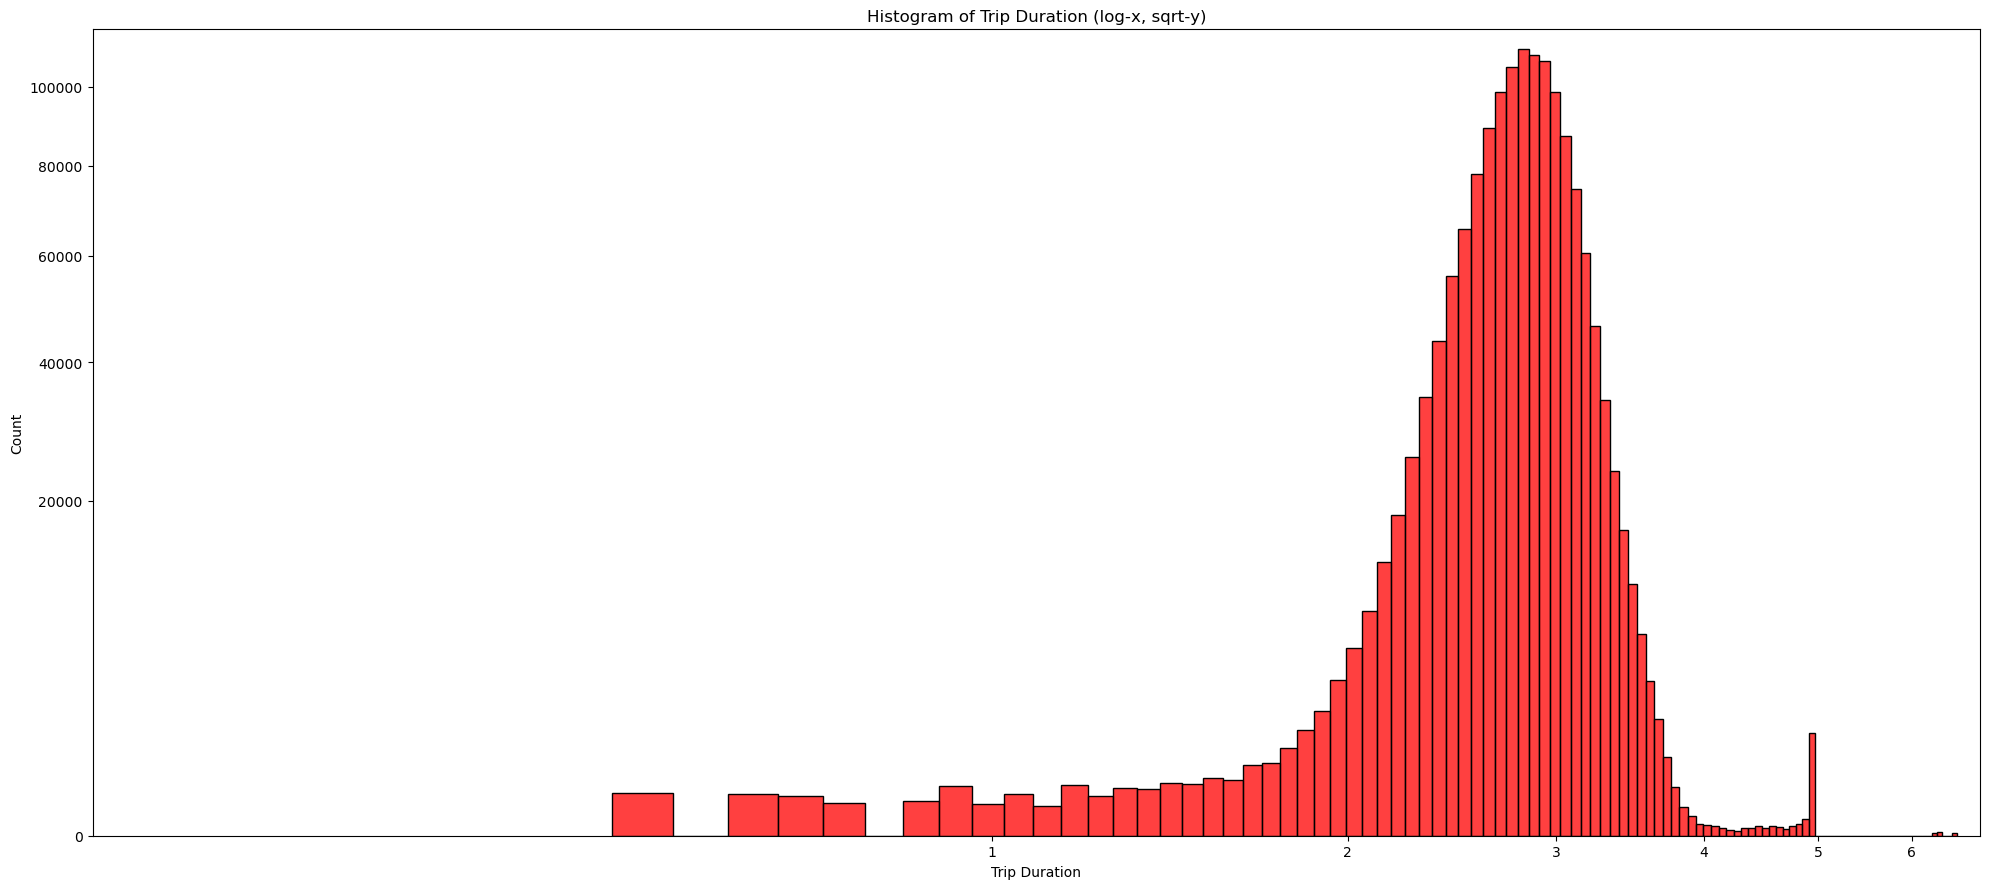

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

filtered = train[train["trip_duration"] > 2].copy()

# Plot
plt.figure(figsize=(20, 9))
sns.histplot(
    np.log10(filtered['trip_duration']), 
    bins=100, 
    color="red"
)

# Custom log10 scale for y-axis
def log10_transform(y):
    return np.log10(y)

def log10_inverse(y):
    return 10 ** y

# Custom sqrt scale for y-axis
def sqrt_transform(y):
    return np.sqrt(y)
def sqrt_inverse(y):
    return y**2

plt.xscale('function', functions=(log10_transform, log10_inverse))         # Log10 scale for x-axis
plt.yscale('function', functions=(sqrt_transform, sqrt_inverse))
plt.xlabel("Trip Duration")
plt.ylabel("Count")
plt.title("Histogram of Trip Duration (log-x, sqrt-y)")
plt.tight_layout()
plt.show()

# Arcsinh transformation
# plt.figure(figsize=(20, 9))
# sns.histplot(np.arcsinh(df["trip_duration"]), bins=150, color="red")
# plt.xlabel("arcsinh(trip_duration)")
# plt.show()

In [13]:
def custom_summary(df):
    summary = df.describe()
    summary.loc['median'] = df.median()
    summary.loc['mode'] = df.mode().iloc[0]
    summary.loc['skew'] = df.skew()
    summary.loc['kurtosis'] = df.kurtosis()
    summary.loc['5%'] = df.quantile(0.05)
    summary.loc['95%'] = df.quantile(0.95)
    return summary

print(custom_summary(train.trip_duration))

count      1458644.000
mean           959.492
std           5237.432
min              1.000
25%            397.000
50%            662.000
75%           1075.000
max        3526282.000
median         662.000
mode           368.000
skew           343.164
kurtosis    192131.517
5%             180.000
95%           2104.000
Name: trip_duration, dtype: float64


## **Pickup/Dropout 'rates' over the year**

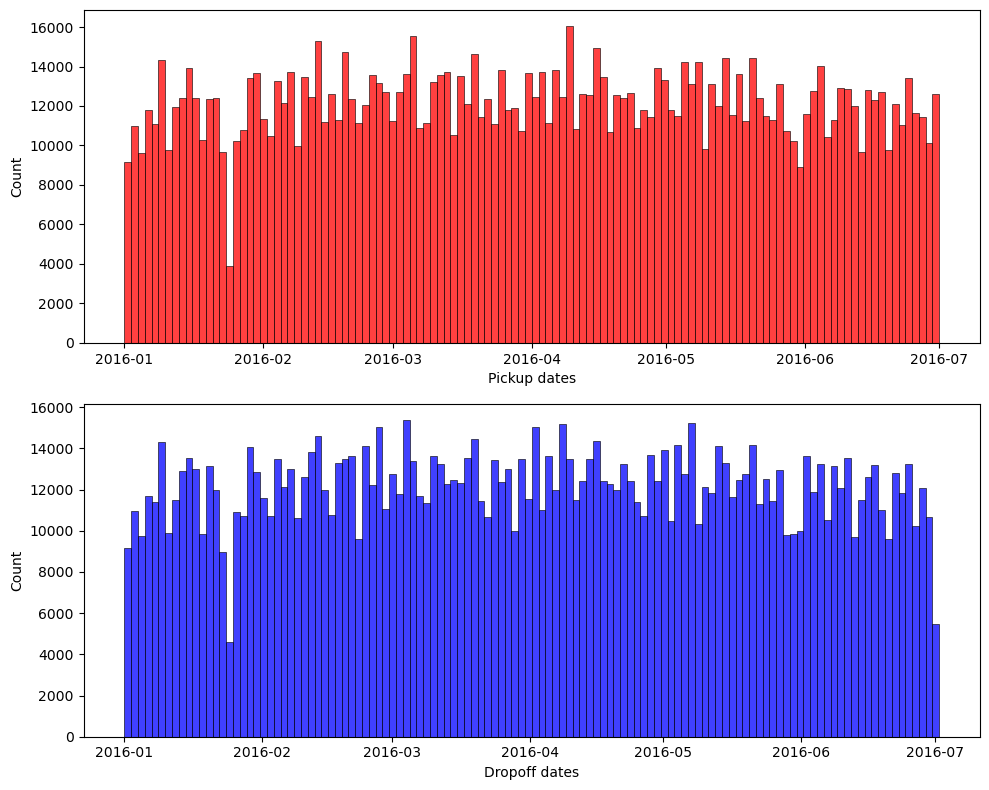

In [14]:
display(Markdown("## **Pickup/Dropout 'rates' over the year**"))

fig, axes = plt.subplots(2, 1, figsize=(10,8), sharex=False)

# Pickup datetime histogram
sns.histplot(train['pickup_datetime'], bins=120, color='red', ax=axes[0])
axes[0].set_xlabel("Pickup dates")
axes[0].set_ylabel("Count")

# Dropoff datetime histogram
sns.histplot(train['dropoff_datetime'], bins=120, color='blue', ax=axes[1])
axes[1].set_xlabel("Dropoff dates")
axes[1].set_ylabel("Count")



plt.tight_layout()
plt.show()

## **Pickup 'rates' over the start of the year (January, February)**

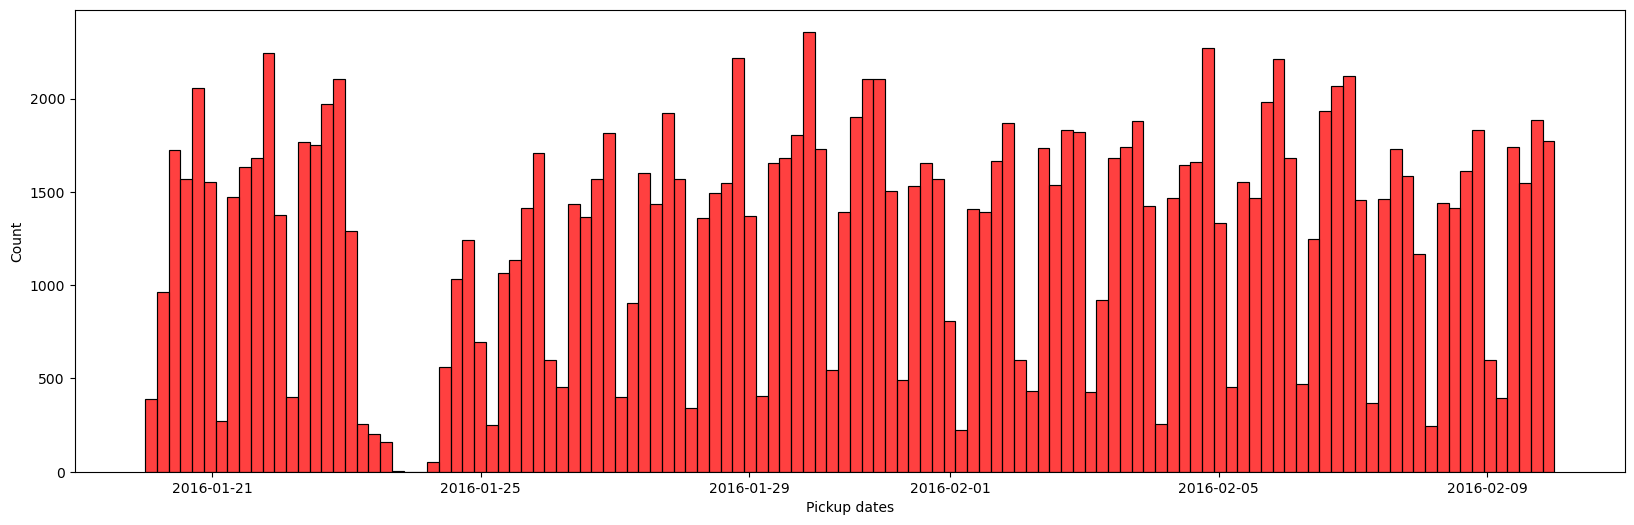

In [15]:
display(Markdown("## **Pickup 'rates' over the start of the year (January, February)**"))

filtered = train[
    (train['pickup_datetime'] > pd.to_datetime("2016-01-20")) &
    (train['pickup_datetime'] < pd.to_datetime("2016-02-10"))
]
plt.figure(figsize=(20,6))
sns.histplot(filtered['pickup_datetime'], bins=120, color='red')
plt.xlabel("Pickup dates")
plt.ylabel("Count")
plt.show()

## **Some default graphs**

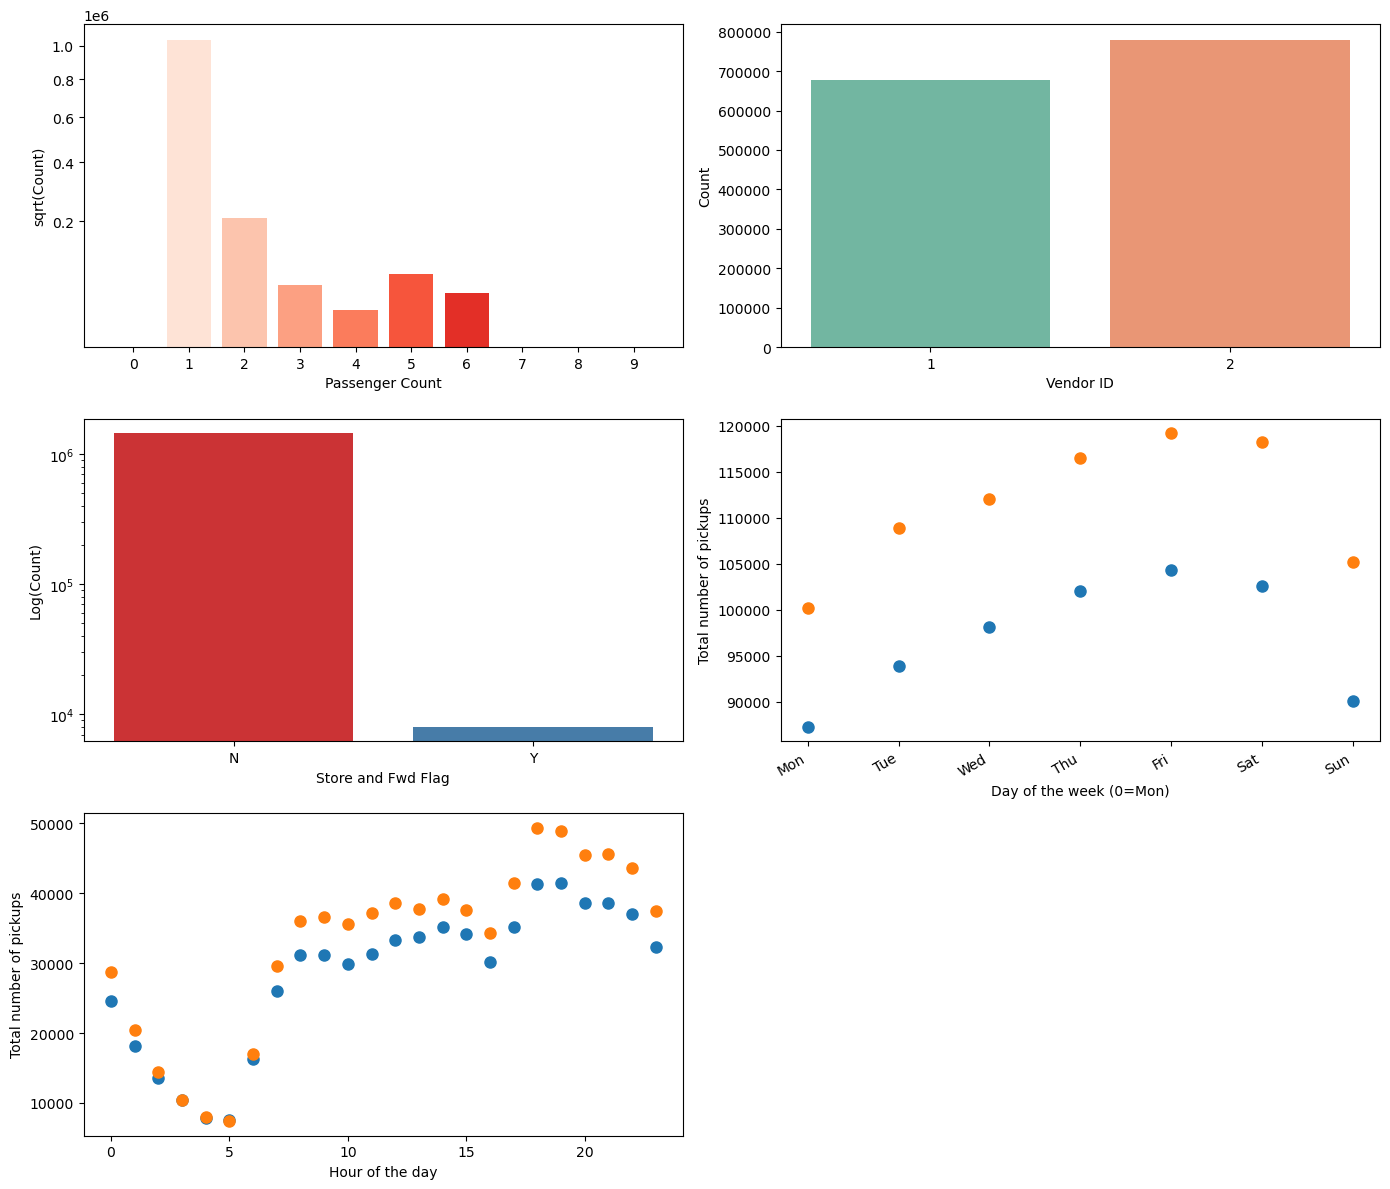

In [16]:
display(Markdown("## **Some default graphs**"))
fig, axes = plt.subplots(3, 2, figsize=(14,12))

# 1. Passenger count barplot (y=sqrt), fix: convert index to int for color scaling
passenger_counts = train['passenger_count'].value_counts().sort_index()
index_numeric = passenger_counts.index.astype(int)
axes[0, 0].bar(
    passenger_counts.index.astype(str),  # show as category labels
    passenger_counts.values,
    color=plt.cm.Reds(index_numeric / max(index_numeric))
)
axes[0, 0].set_yscale('function', functions=(np.sqrt, lambda y: y ** 2))
axes[0, 0].set_xlabel("Passenger Count")
axes[0, 0].set_ylabel("sqrt(Count)")

# 2. Vendor ID barplot (no legend)
sns.countplot(x='vendor_id', hue='vendor_id', data=train, ax=axes[0, 1], palette='Set2', legend=False)
axes[0, 1].set_xlabel("Vendor ID")
axes[0, 1].set_ylabel("Count")

# 3. Store and fwd flag barplot (no legend)
sns.countplot(x='store_and_fwd_flag', hue='store_and_fwd_flag', data=train, ax=axes[1, 0], palette='Set1', legend=False)
axes[1, 0].set_yscale('log')
axes[1, 0].set_xlabel("Store and Fwd Flag")
axes[1, 0].set_ylabel("Log(Count)")

# 4. Pickups by weekday and vendor (scatter)
pickup_by_day_vendor = train.groupby(['wday', 'vendor_id'], observed=True).size().reset_index(name='n')
for vendor_id, grp in pickup_by_day_vendor.groupby('vendor_id', observed=True):
    axes[1, 1].scatter(grp['wday'], grp['n'], label=f'Vendor {vendor_id}', s=64)
order  = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
ticks  = range(len(order))
axes[1, 1].set_xticks(ticks)
axes[1, 1].set_xticklabels(order, rotation=30, ha='right')
axes[1, 1].set_xlabel("Day of the week (0=Mon)")
axes[1, 1].set_ylabel("Total number of pickups")

# 5. Pickups by hour and vendor (scatter)
pickup_by_hour_vendor = train.groupby(['hour', 'vendor_id'], observed=True).size().reset_index(name='n')
for vendor_id, grp in pickup_by_hour_vendor.groupby('vendor_id', observed=True):
    axes[2, 0].scatter(grp['hour'], grp['n'], label=f'Vendor {vendor_id}', s=64)
axes[2, 0].set_xlabel("Hour of the day")
axes[2, 0].set_ylabel("Total number of pickups")

# Hide the last subplot (bottom right) if not used
axes[2, 1].axis('off')

plt.tight_layout()
plt.show()

## **Month/Week - hourly pick-up 'rate'**

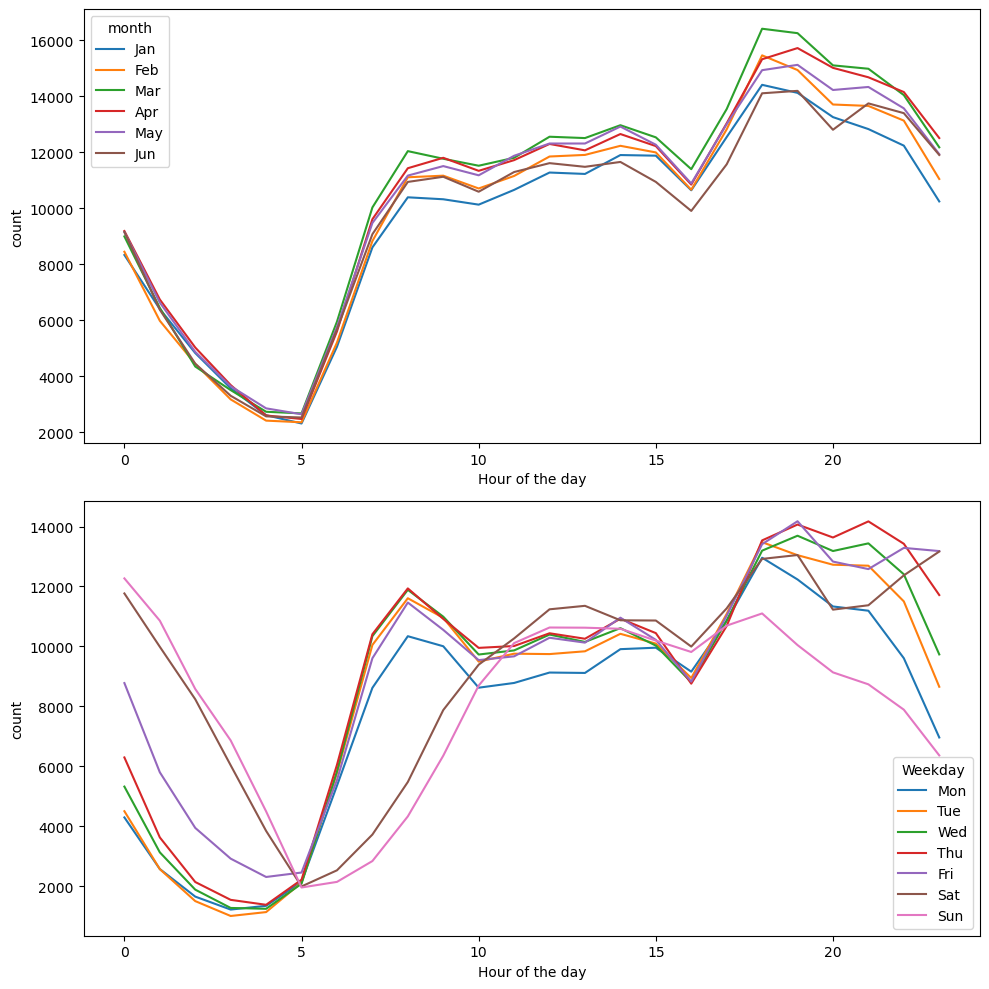

In [17]:
display(Markdown("## **Month/Week - hourly pick-up 'rate'**"))

fig, axes = plt.subplots(2, 1, figsize=(10,10))

hour_month = train.groupby(['hour', 'month'], observed=True).size().reset_index(name='n')
for month, grp in hour_month.groupby('month', observed=True):
    axes[0].plot(grp['hour'], grp['n'], label=month)
axes[0].set_xlabel("Hour of the day")
axes[0].set_ylabel("count")
axes[0].legend(title='month')

# By hour and weekday
hour_wday = train.groupby(['hour', 'wday'], observed=True).size().reset_index(name='n')
for wday, grp in hour_wday.groupby('wday', observed=True):
    axes[1].plot(grp['hour'], grp['n'], label=wday)
axes[1].set_xlabel("Hour of the day")
axes[1].set_ylabel("count")
axes[1].legend(title='Weekday')

plt.tight_layout()
plt.show()

## **Coordinates distribution plots**

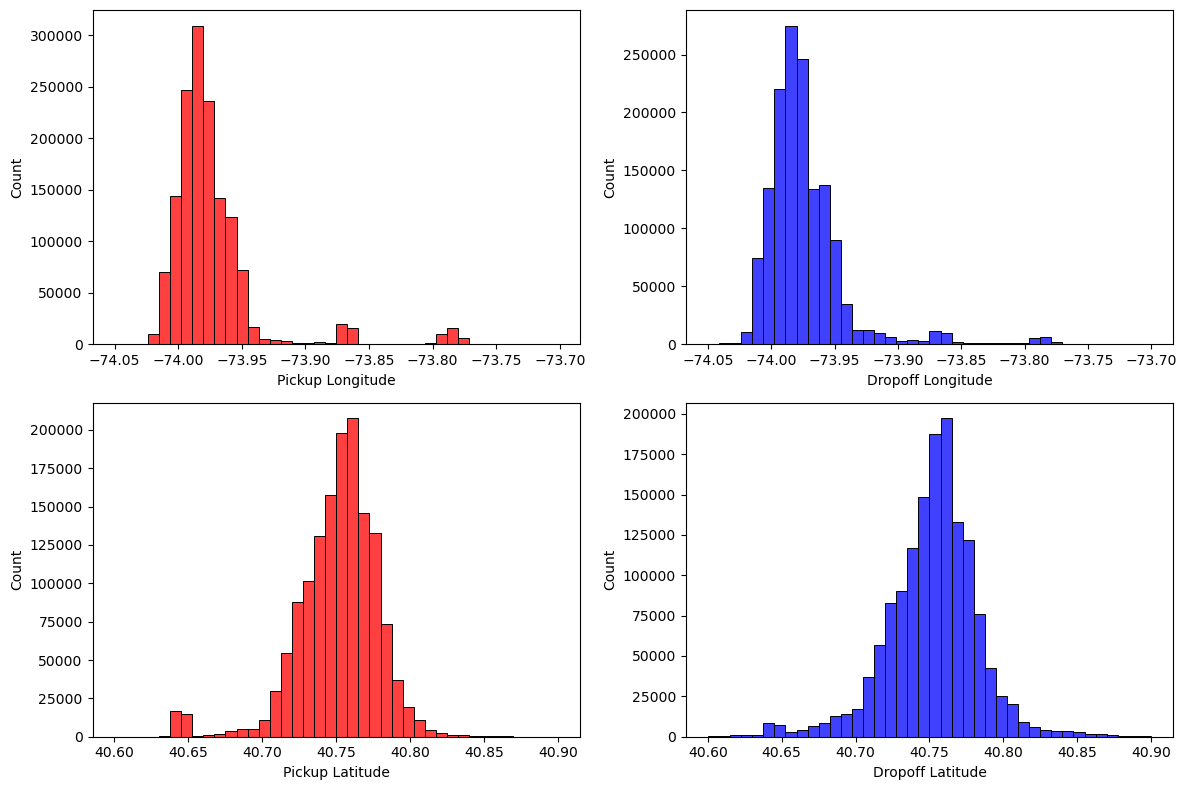

In [18]:
display(Markdown("## **Coordinates distribution plots**"))

fig, axes = plt.subplots(2, 2, figsize=(12,8))

# Pickup longitude
sns.histplot(
    train[(train['pickup_longitude'] > -74.05) & (train['pickup_longitude'] < -73.7)]['pickup_longitude'],
    bins=40, color='red', ax=axes[0,0]
)
axes[0,0].set_xlabel("Pickup Longitude")
axes[0,0].set_ylabel("Count")

# Dropoff longitude
sns.histplot(
    train[(train['dropoff_longitude'] > -74.05) & (train['dropoff_longitude'] < -73.7)]['dropoff_longitude'],
    bins=40, color='blue', ax=axes[0,1]
)
axes[0,1].set_xlabel("Dropoff Longitude")
axes[0,1].set_ylabel("Count")

# Pickup latitude
sns.histplot(
    train[(train['pickup_latitude'] > 40.6) & (train['pickup_latitude'] < 40.9)]['pickup_latitude'],
    bins=40, color='red', ax=axes[1,0]
)
axes[1,0].set_xlabel("Pickup Latitude")
axes[1,0].set_ylabel("Count")

# Dropoff latitude
sns.histplot(
    train[(train['dropoff_latitude'] > 40.6) & (train['dropoff_latitude'] < 40.9)]['dropoff_latitude'],
    bins=40, color='blue', ax=axes[1,1]
)
axes[1,1].set_xlabel("Dropoff Latitude")
axes[1,1].set_ylabel("Count")

plt.tight_layout()
plt.show()

## Conclusions regarding graphs

1. `world map (NYC)` - **(folium - placing coordinates)**
    - most trips are around Manhatten
    - other notable places (JFK airport, La Guardia airport)
2. `trip_duration / count` - **hist (distribution)**
    - outliers (<5 & >24 hour trips)
    - log-norm distribution
3. `pick-up & drop-out dates / count` - **hist (distribution)**
    - fairly homogeneous (january - july 2016)
    - drop around "late January - early February"
4. `pick-up dates / count` **in January-February** - **hist (distribution)**
    - winter in NYC - mbe snow storms / heavy weather
        - should take into account -> **any external data set**
5. `multi-plot` investigation on features 
    - `passenger_count / count`
        - rare 0 passenger trips
        - vast majority "1-2" passengers (then "5-6", and less "3-4")
    - `vendor_id / count` - countplot
        - 2nd vendor has more trips 
    - `fwd flag / count` - countplot
        - almost no storing of data happened (logarithmic y-axis) - (8000 vs 1.5m) <0.5%
    - `week_day / number_of_pickups` - plot
        - monday (least common), friday (most common)
        - vendor 2 still has more trips (every week)
    - `hour / number_of_pickups` - plot
        - huge drop in trips during early morning (4-5 am) -> also why little differents between vendors there
        - another drop around 4-5 pm -> increases afterwards
6. `month/week pickup / count` - **plot**
    - months
        - January & June fewer trips - March & Apr busiest
    - weeks
        - Sat, Sun, Fri - higher trip numbers during the early morning & lower in morning (5-10 am),
            - contrast between NYC business & weekend nights
        - trip numbers drop on a Sunday evening/night
7. `coordinates / count` - **hist (distribution)**
    - few cases way outside the NYC boundaries -> distributions are consistent with the focus on Manhattan
        - need to keep the existence of these values -> so they don’t bias analysis

## 3. Feature relations

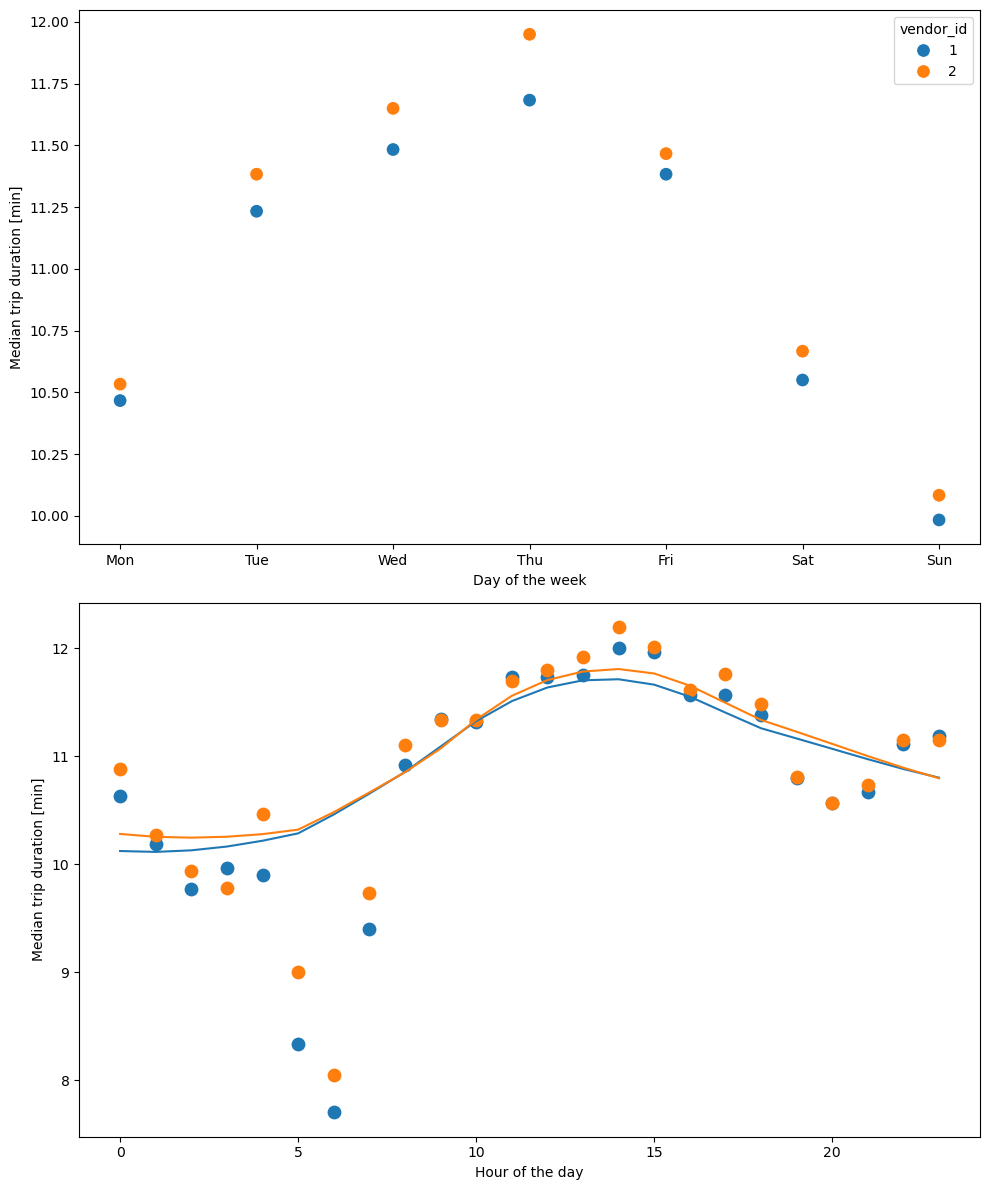

In [19]:
import numpy as numpy
from statsmodels.nonparametric.smoothers_lowess import lowess

# assume `train` is your DataFrame
train['pickup_datetime'] = pd.to_datetime(train['pickup_datetime'])
# create weekday (Mon, Tue, …) and hour columns


# group and compute medians (in minutes)
df_wday = (
    train
    .groupby(['wday', 'vendor_id'], observed=True)['trip_duration']
    .median()
    .reset_index(name='median_duration_min')
)
df_wday['median_duration_min'] /= 60

df_hour = (
    train
    .groupby(['hour', 'vendor_id'], observed=True)['trip_duration']
    .median()
    .reset_index(name='median_duration_min')
)
df_hour['median_duration_min'] /= 60

# plot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

# scatter by weekday
sns.scatterplot(
    data=df_wday,
    x='wday',
    y='median_duration_min',
    hue='vendor_id',
    s=100,
    ax=ax1
)
ax1.set_xlabel('Day of the week')
ax1.set_ylabel('Median trip duration [min]')

# LOESS + scatter by hour
for vid, color in zip(sorted(df_hour['vendor_id'].unique()), sns.color_palette()):
    sub = df_hour[df_hour['vendor_id'] == vid]
    # scatter
    ax2.scatter(sub['hour'], sub['median_duration_min'], label=vid, s=80, color=color)
    # LOESS smoothing
    loess_sm = lowess(
        endog=sub['median_duration_min'],
        exog=sub['hour'],
        frac=0.5,
        return_sorted=True
    )
    ax2.plot(loess_sm[:, 0], loess_sm[:, 1], color=color)
ax2.set_xlabel('Hour of the day')
ax2.set_ylabel('Median trip duration [min]')
ax2.legend(title='vendor_id')
ax2.legend_.remove()

plt.tight_layout()
plt.show()

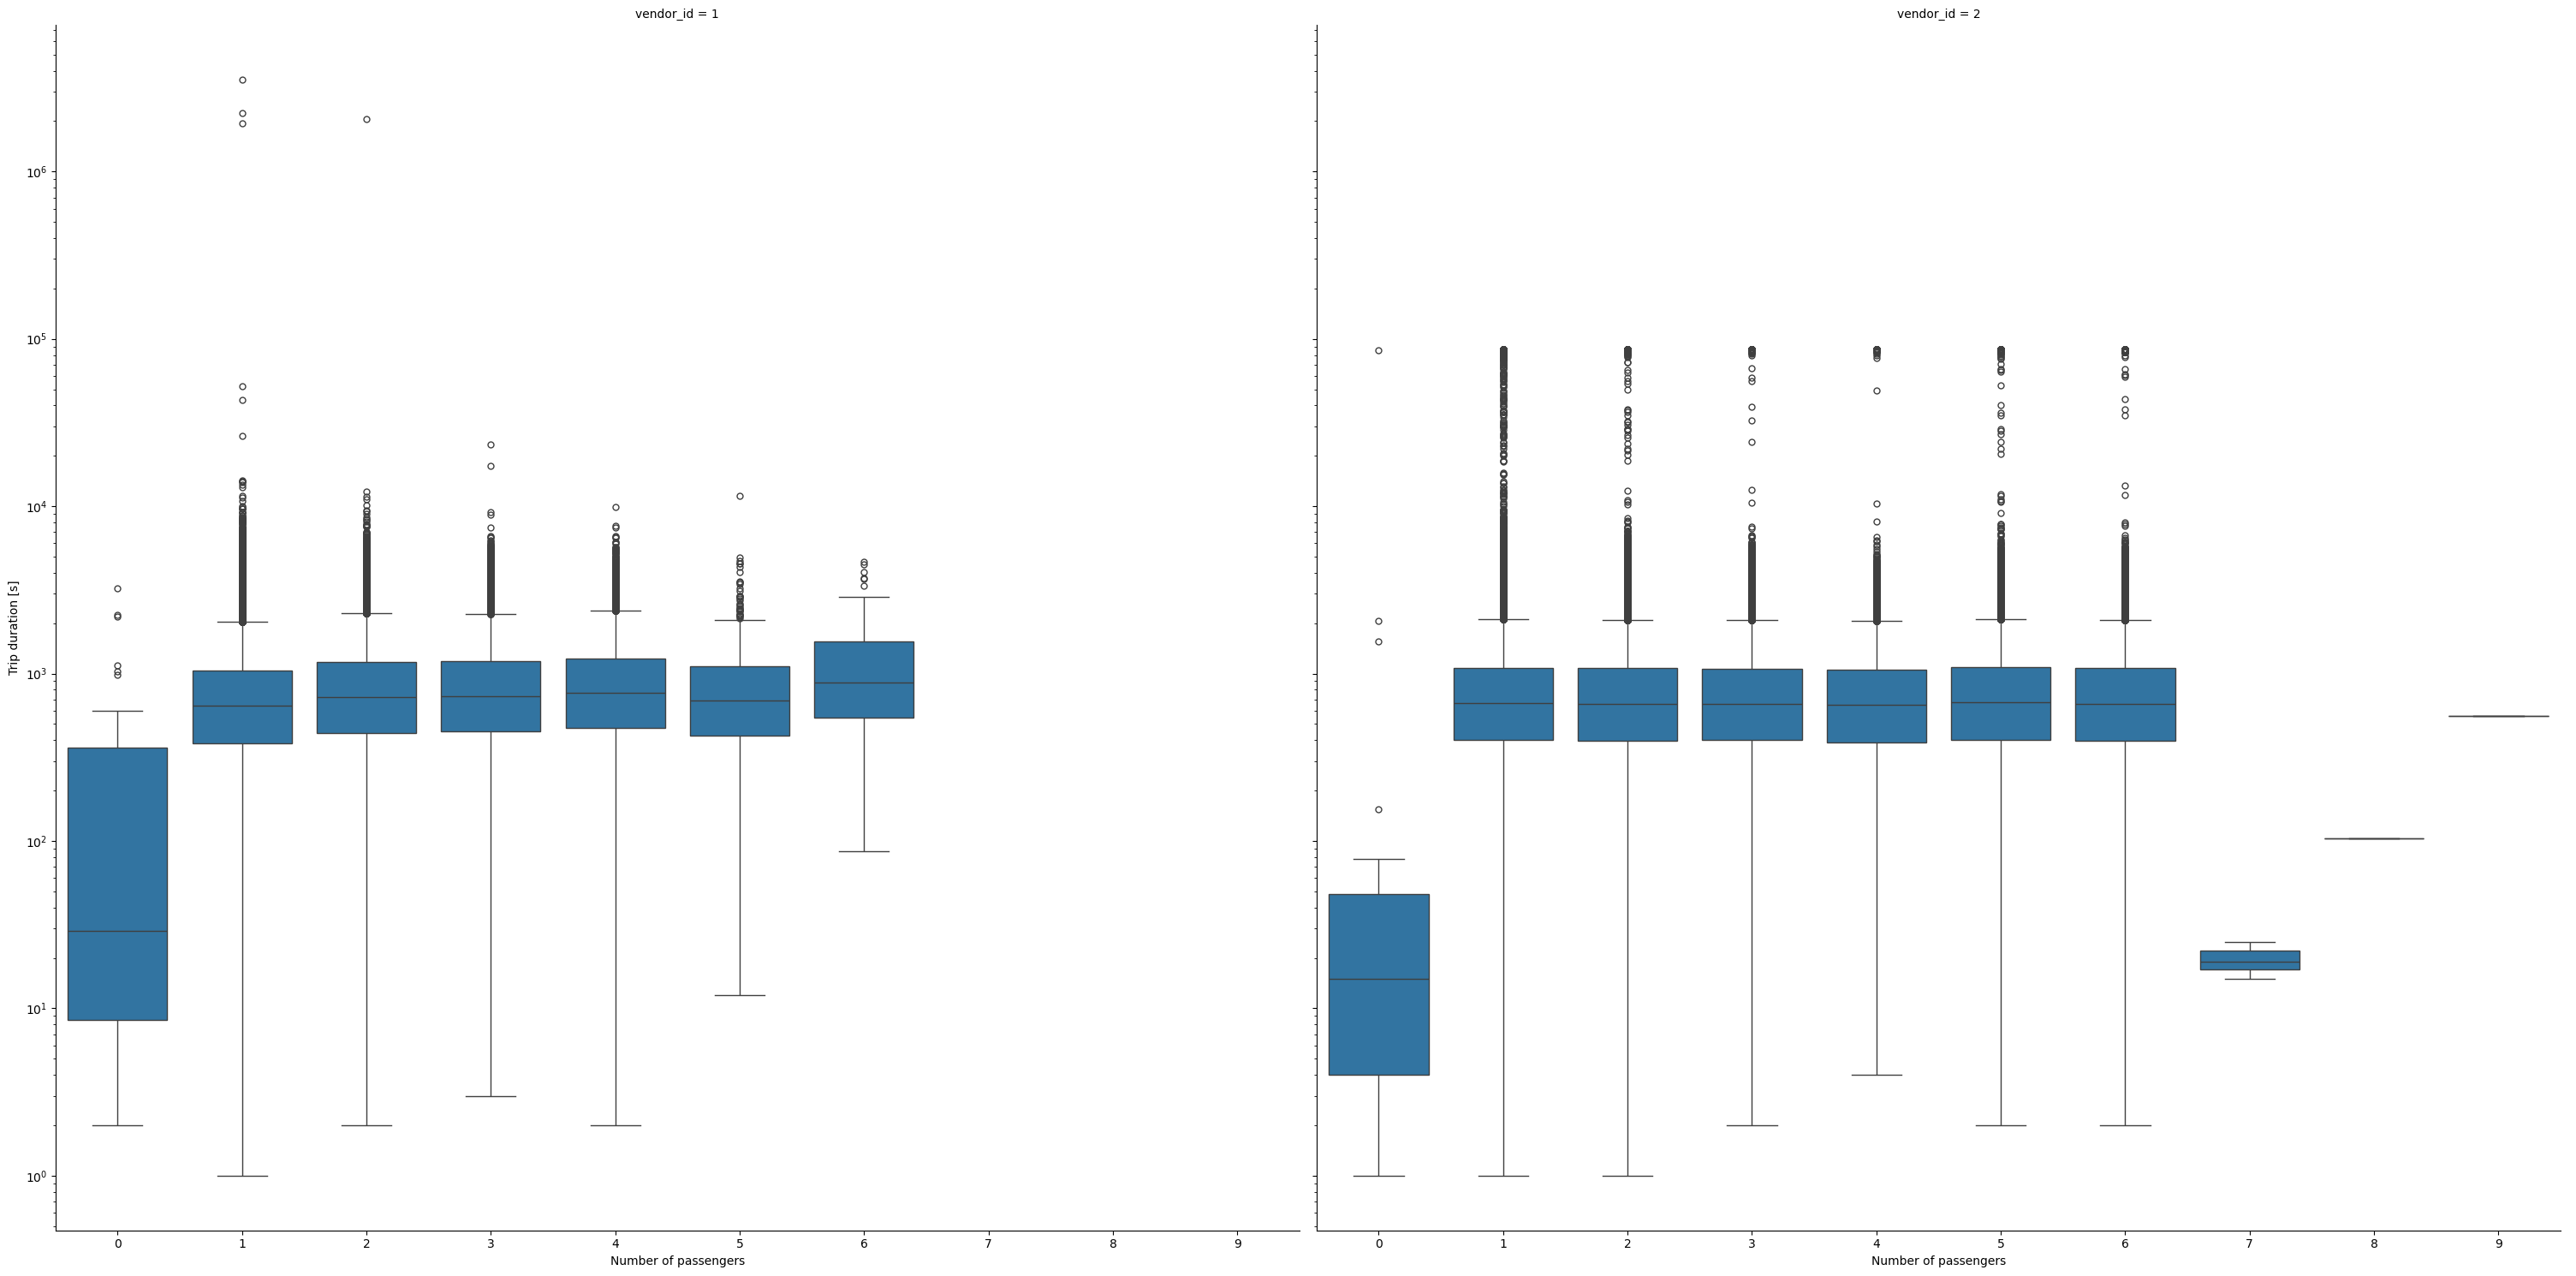

In [20]:
g = sns.catplot(
    data=train,
    x='passenger_count',
    y='trip_duration',
    col='vendor_id',
    kind='box',
    height=15,
    aspect=1
)
g.set(yscale='log')
g.set_axis_labels('Number of passengers', 'Trip duration [s]')
plt.tight_layout()
plt.show()

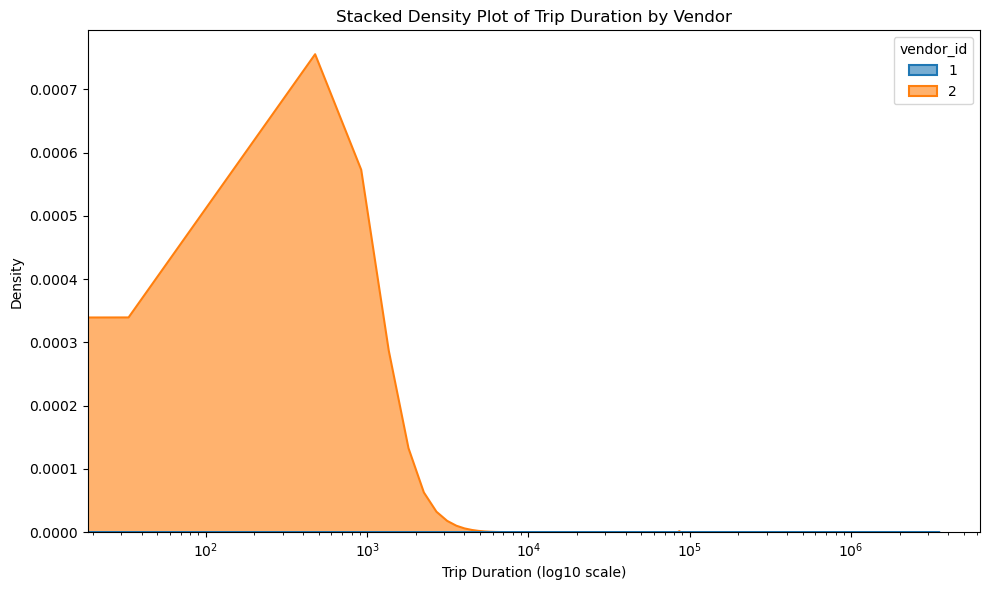

In [21]:
# Plot
plt.figure(figsize=(10, 6))

# Density plot with separate normalization per group (stacked effect)
sns.kdeplot(
    data=train,
    x='trip_duration',
    hue='vendor_id',
    fill=True,
    common_norm=False,  # Important for stacking
    alpha=0.6,
    linewidth=1.5
)

# Log10 scale for x-axis
plt.xscale('log')
plt.xlabel('Trip Duration (log10 scale)')
plt.ylabel('Density')
plt.title('Stacked Density Plot of Trip Duration by Vendor')
plt.tight_layout()
plt.show()

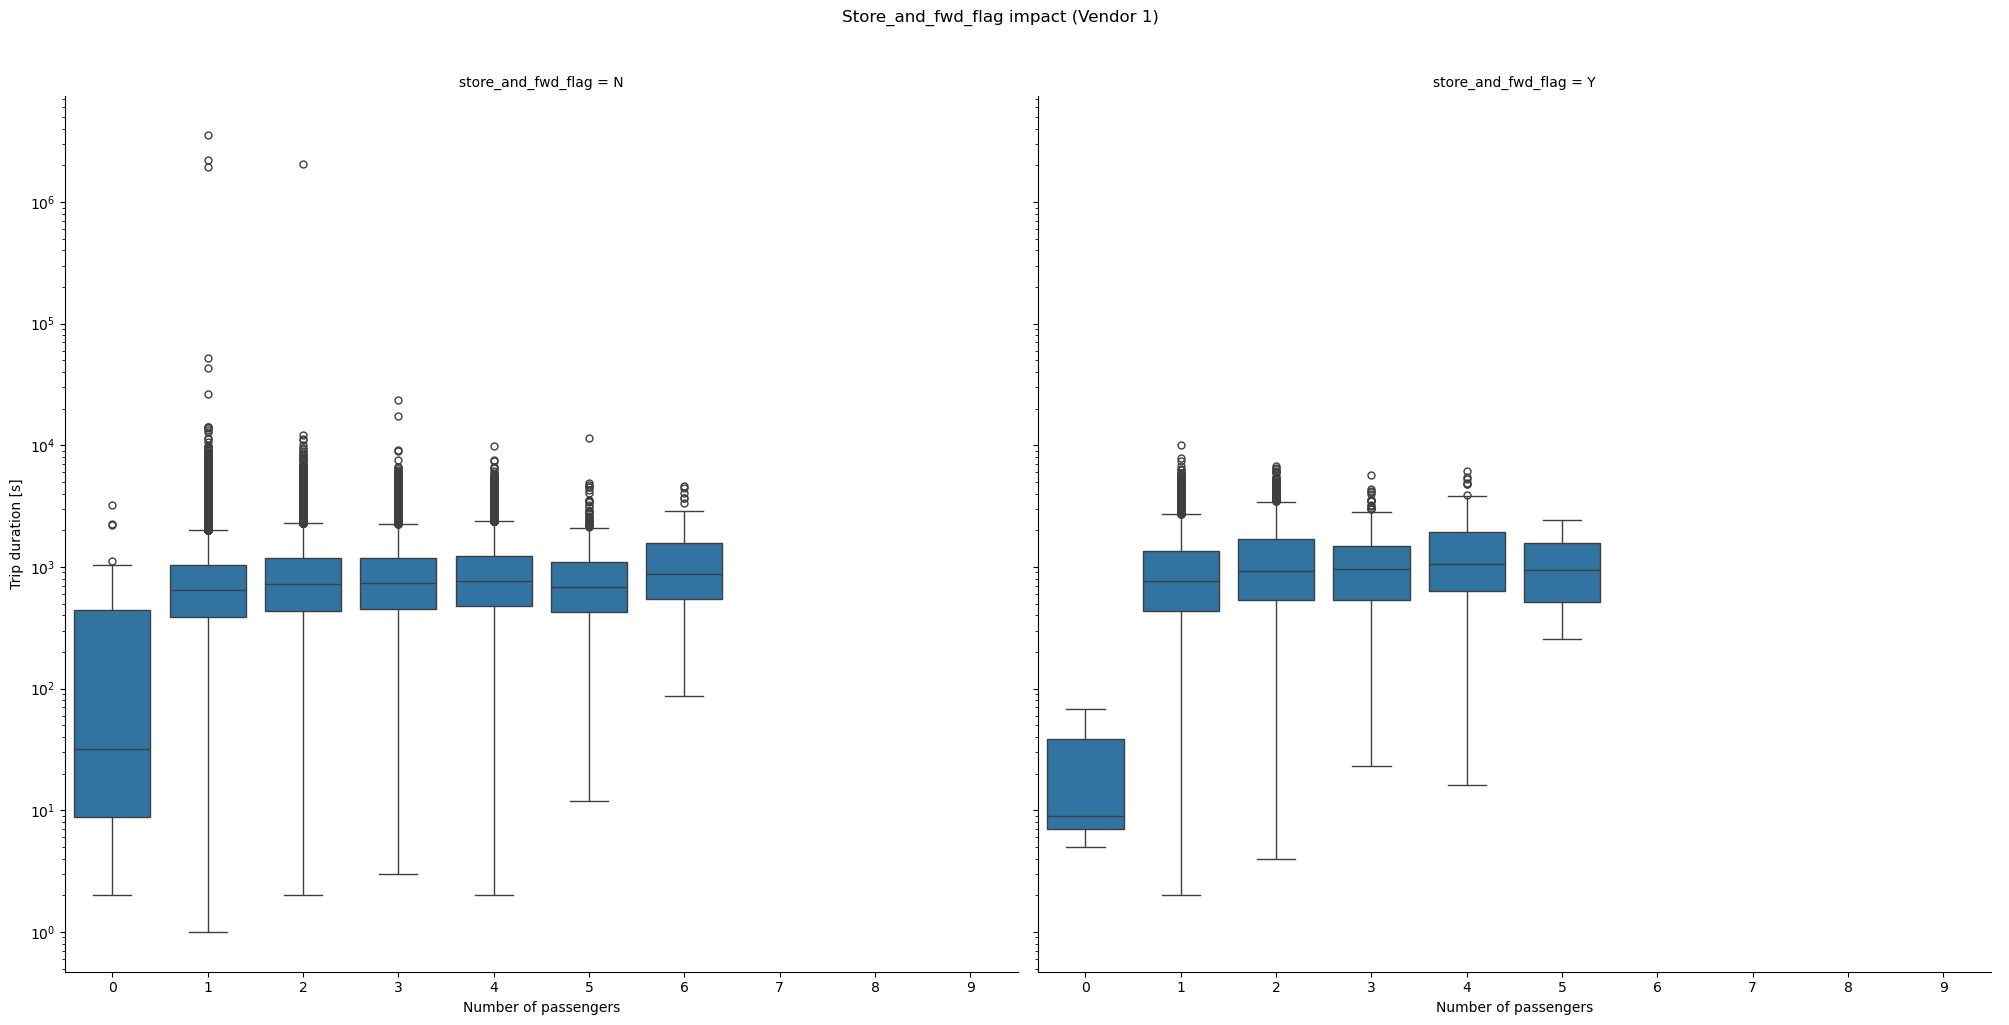

In [22]:
subset = train[train['vendor_id'] == 1]

g = sns.catplot(
    data=subset,
    x='passenger_count',
    y='trip_duration',
    col='store_and_fwd_flag',
    kind='box',
    height=10,
    aspect=1
)
g.set(yscale='log')
g.set_axis_labels('Number of passengers', 'Trip duration [s]')
g.fig.suptitle('Store_and_fwd_flag impact (Vendor 1)', y=1.02)
plt.tight_layout()
plt.show()

## 4. Feature engineering

In [ ]:
# 1. Haversine distance (returns meters)
def haversine_np(lon1, lat1, lon2, lat2):
    # convert degrees → radians
    lon1, lat1, lon2, lat2 = map(np.radians, (lon1, lat1, lon2, lat2))
    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2
    c = 2 * np.arcsin(np.sqrt(a))
    R = 6_378_137  # Earth radius in meters
    return R * c

# 2. Bearing calculation (returns degrees from north)
def bearing_np(lon1, lat1, lon2, lat2):
    lon1, lat1, lon2, lat2 = map(np.radians, (lon1, lat1, lon2, lat2))
    dlon = lon2 - lon1
    x = np.sin(dlon) * np.cos(lat2)
    y = np.cos(lat1)*np.sin(lat2) - np.sin(lat1)*np.cos(lat2)*np.cos(dlon)
    brng = np.degrees(np.arctan2(x, y))
    return ((brng + 180) % 360) - 180


# 3. Airport coordinates
jfk_coord = (-73.778889, 40.639722)
lg_coord  = (-73.872611, 40.777250)


# 4. Core distance & bearing
train['dist']    = haversine_np(
    train['pickup_longitude'], train['pickup_latitude'],
    train['dropoff_longitude'], train['dropoff_latitude']
)
train['bearing'] = bearing_np(
    train['pickup_longitude'], train['pickup_latitude'],
    train['dropoff_longitude'], train['dropoff_latitude']
)


# 5. Distance to airports
train['jfk_dist_pick'] = haversine_np(
    train['pickup_longitude'], train['pickup_latitude'],
    jfk_coord[0], jfk_coord[1]
)
train['jfk_dist_drop'] = haversine_np(
    train['dropoff_longitude'], train['dropoff_latitude'],
    jfk_coord[0], jfk_coord[1]
)
train['lg_dist_pick']  = haversine_np(
    train['pickup_longitude'], train['pickup_latitude'],
    lg_coord[0], lg_coord[1]
)
train['lg_dist_drop']  = haversine_np(
    train['dropoff_longitude'], train['dropoff_latitude'],
    lg_coord[0], lg_coord[1]
)


# 6. Temporal features & flags
train['speed'] = train['dist'] / train['trip_duration'] * 3.6  # km/h

train['work'] = (
    train['hour'].between(8, 18) &
    train['wday'].isin(['Mon','Tue','Wed','Thu','Fri'])
)

train['jfk_trip'] = (
    (train['jfk_dist_pick'] < 2e3) |
    (train['jfk_dist_drop'] < 2e3)
)
train['lg_trip'] = (
    (train['lg_dist_pick'] < 2e3) |
    (train['lg_dist_drop'] < 2e3)
)


# 8. Blizzard flag (2016-01-22 through 2016-01-29 inclusive)
bliz_start = pd.to_datetime("2016-01-22").date()
bliz_end   = pd.to_datetime("2016-01-29").date()
train['blizzard'] = train['date'].between(bliz_start, bliz_end)

In [24]:
train.head(5)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,date,hour,wday,month,dist,bearing,jfk_dist_pick,jfk_dist_drop,lg_dist_pick,lg_dist_drop,speed,work,jfk_trip,lg_trip,blizzard
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982,40.768,-73.965,40.766,N,455,2016-03-14,17,Mon,Mar,1500.199,99.970,22315.023,21025.401,9292.897,1296.637,11.870,True,False,True,False
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980,40.739,-73.999,40.731,N,663,2016-06-12,0,Sun,Jun,1807.530,-117.154,20258.983,21220.978,10058.778,5131.653,9.815,False,False,False,False
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979,40.764,-74.005,40.710,N,2124,2016-01-19,11,Tue,Jan,6392.251,-159.680,21828.538,20660.390,9092.997,7476.571,10.834,True,False,False,False
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010,40.720,-74.012,40.707,N,429,2016-04-06,19,Wed,Apr,1487.163,-172.738,21461.510,21068.177,13228.107,7851.537,12.480,False,False,False,False
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973,40.793,-73.973,40.783,N,435,2016-03-26,13,Sat,Mar,1189.920,179.474,23671.052,22820.138,8650.352,586.686,9.848,False,False,True,False


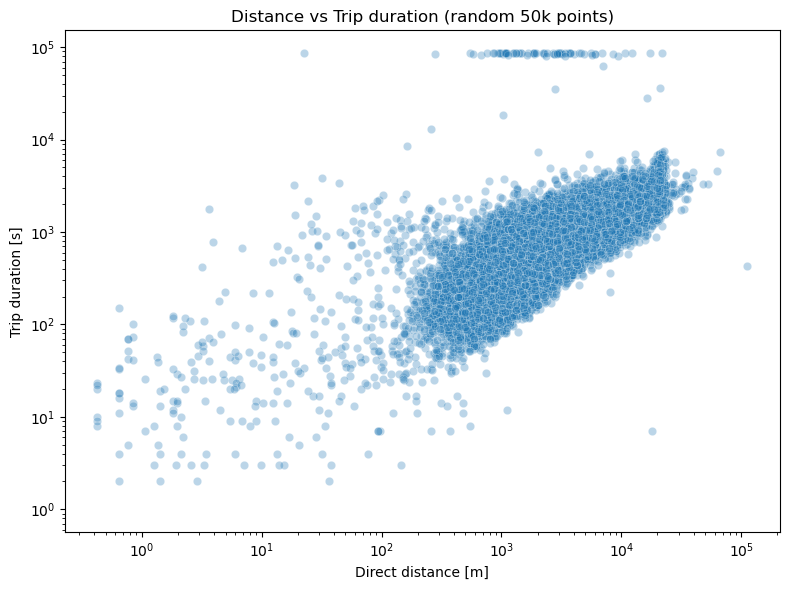

In [25]:
sample = train.sample(n=50_000, random_state=4321)

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=sample,
    x='dist',
    y='trip_duration',
    alpha=0.3
)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Direct distance [m]')
plt.ylabel('Trip duration [s]')
plt.title('Distance vs Trip duration (random 50k points)')
plt.tight_layout()
plt.show()

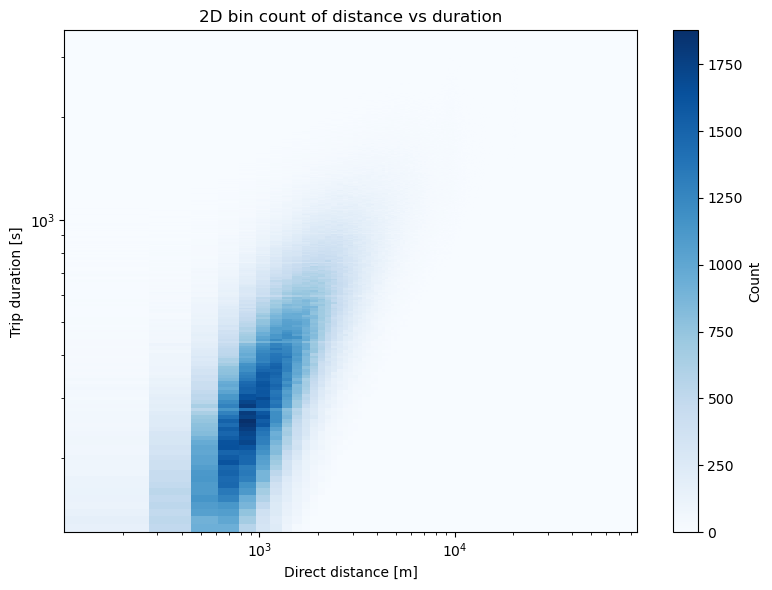

In [26]:
filtered = train.query(
    'trip_duration < 3600 and trip_duration > 120 '
    'and dist > 100 and dist < 100e3'
)

plt.figure(figsize=(8, 6))
plt.hist2d(
    filtered['dist'],
    filtered['trip_duration'],
    bins=(500, 500),
    cmap='Blues'
)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Direct distance [m]')
plt.ylabel('Trip duration [s]')
plt.title('2D bin count of distance vs duration')
plt.colorbar(label='Count')
plt.tight_layout()
plt.show()

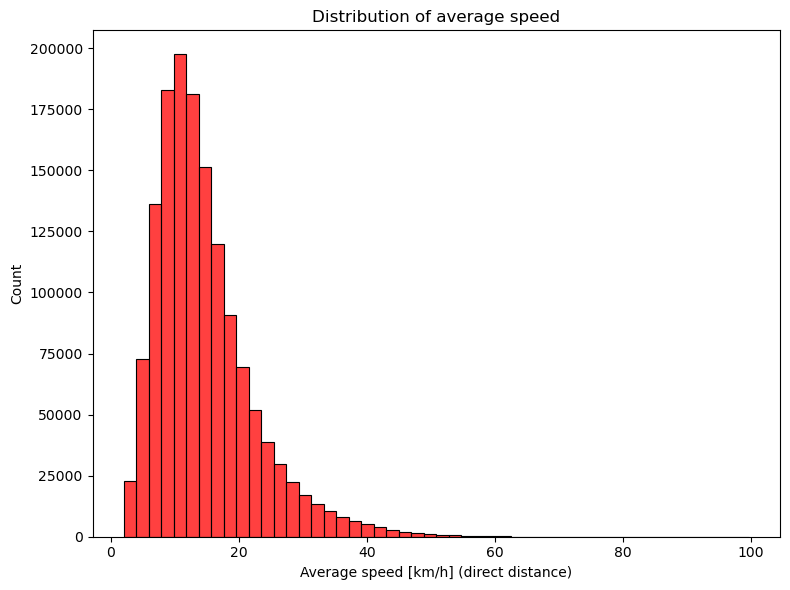

In [27]:
spd = train.query('speed > 2 and speed < 100')

plt.figure(figsize=(8, 6))
sns.histplot(
    spd['speed'],
    bins=50,
    color='red'
)
plt.xlabel('Average speed [km/h] (direct distance)')
plt.title('Distribution of average speed')
plt.tight_layout()
plt.show()

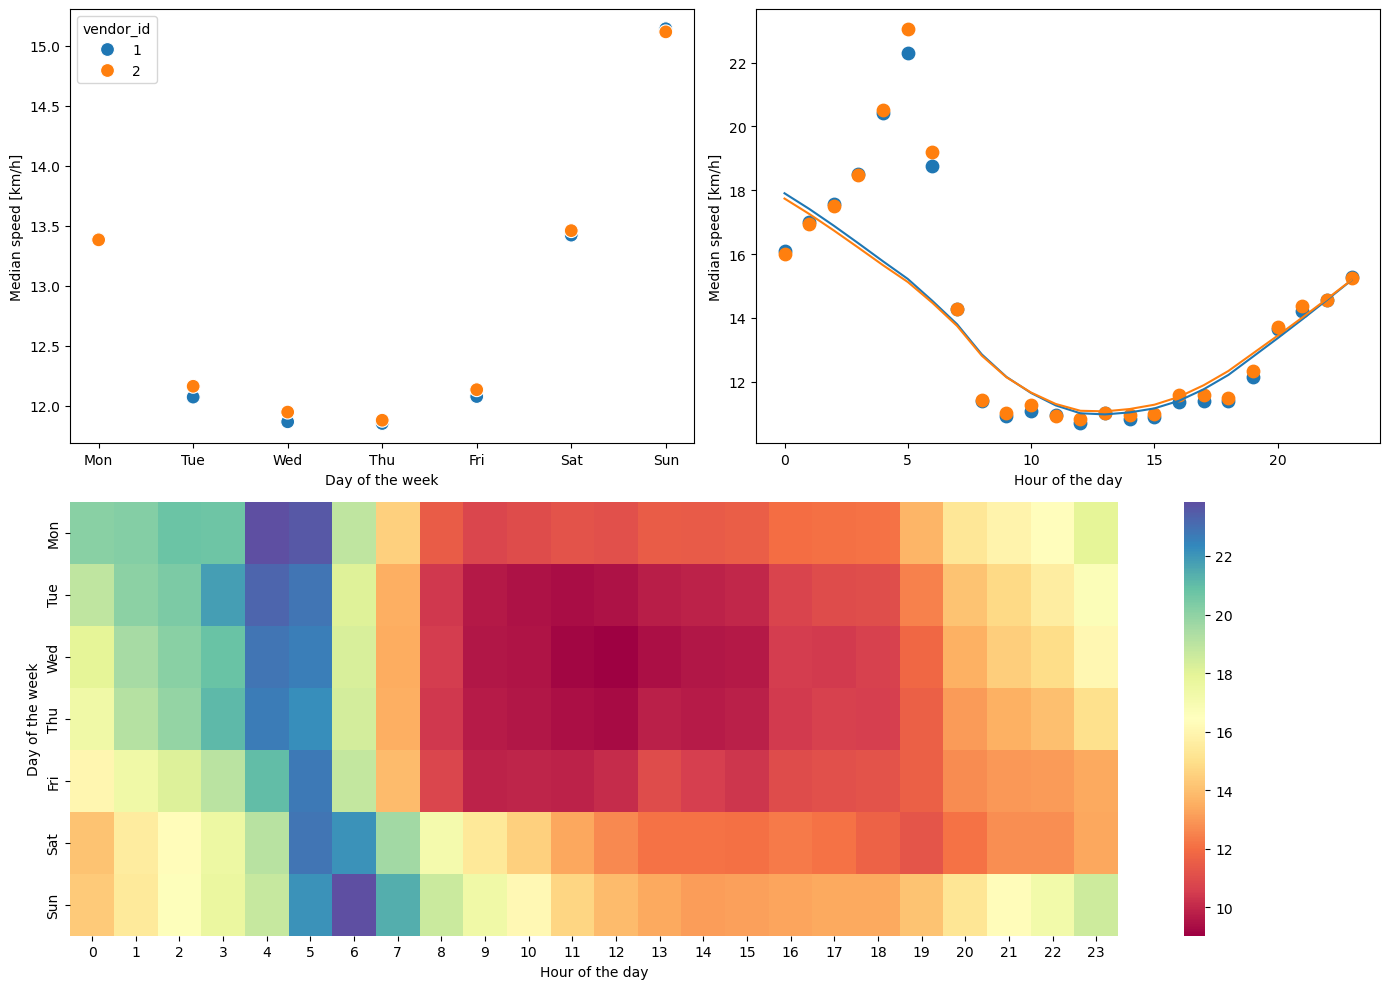

In [28]:
# group for scatter
df_sw = (
    train
    .groupby(['wday', 'vendor_id'], observed=True)['speed']
    .median()
    .reset_index(name='median_speed')
)

df_sh = (
    train
    .groupby(['hour', 'vendor_id'], observed=True)['speed']
    .median()
    .reset_index(name='median_speed')
)

# pivot for heatmap
df_wh = (
    train
    .groupby(['wday', 'hour'], observed=True)['speed']
    .median()
    .unstack(fill_value=0)
)

fig = plt.figure(figsize=(14, 10))
ax1 = plt.subplot2grid((2, 2), (0, 0))
ax2 = plt.subplot2grid((2, 2), (0, 1))
ax3 = plt.subplot2grid((2, 2), (1, 0), colspan=2)

# p1
sns.scatterplot(
    data=df_sw,
    x='wday',
    y='median_speed',
    hue='vendor_id',
    s=100,
    ax=ax1
)
ax1.set_xlabel('Day of the week')
ax1.set_ylabel('Median speed [km/h]')

# p2 (scatter + LOESS)
for vid, color in zip(sorted(df_sh['vendor_id'].unique()), sns.color_palette()):
    sub = df_sh[df_sh['vendor_id'] == vid]
    ax2.scatter(sub['hour'], sub['median_speed'], s=80, color=color)
    sm = lowess(
        endog=sub['median_speed'],
        exog=sub['hour'],
        frac=0.5,
        return_sorted=True
    )
    ax2.plot(sm[:, 0], sm[:, 1], color=color)
ax2.set_xlabel('Hour of the day')
ax2.set_ylabel('Median speed [km/h]')
#ax2.legend_.remove()

# p3 heatmap
sns.heatmap(
    df_wh,
    cmap='Spectral',
    ax=ax3
)
ax3.set_xlabel('Hour of the day')
ax3.set_ylabel('Day of the week')

plt.tight_layout()
plt.show()

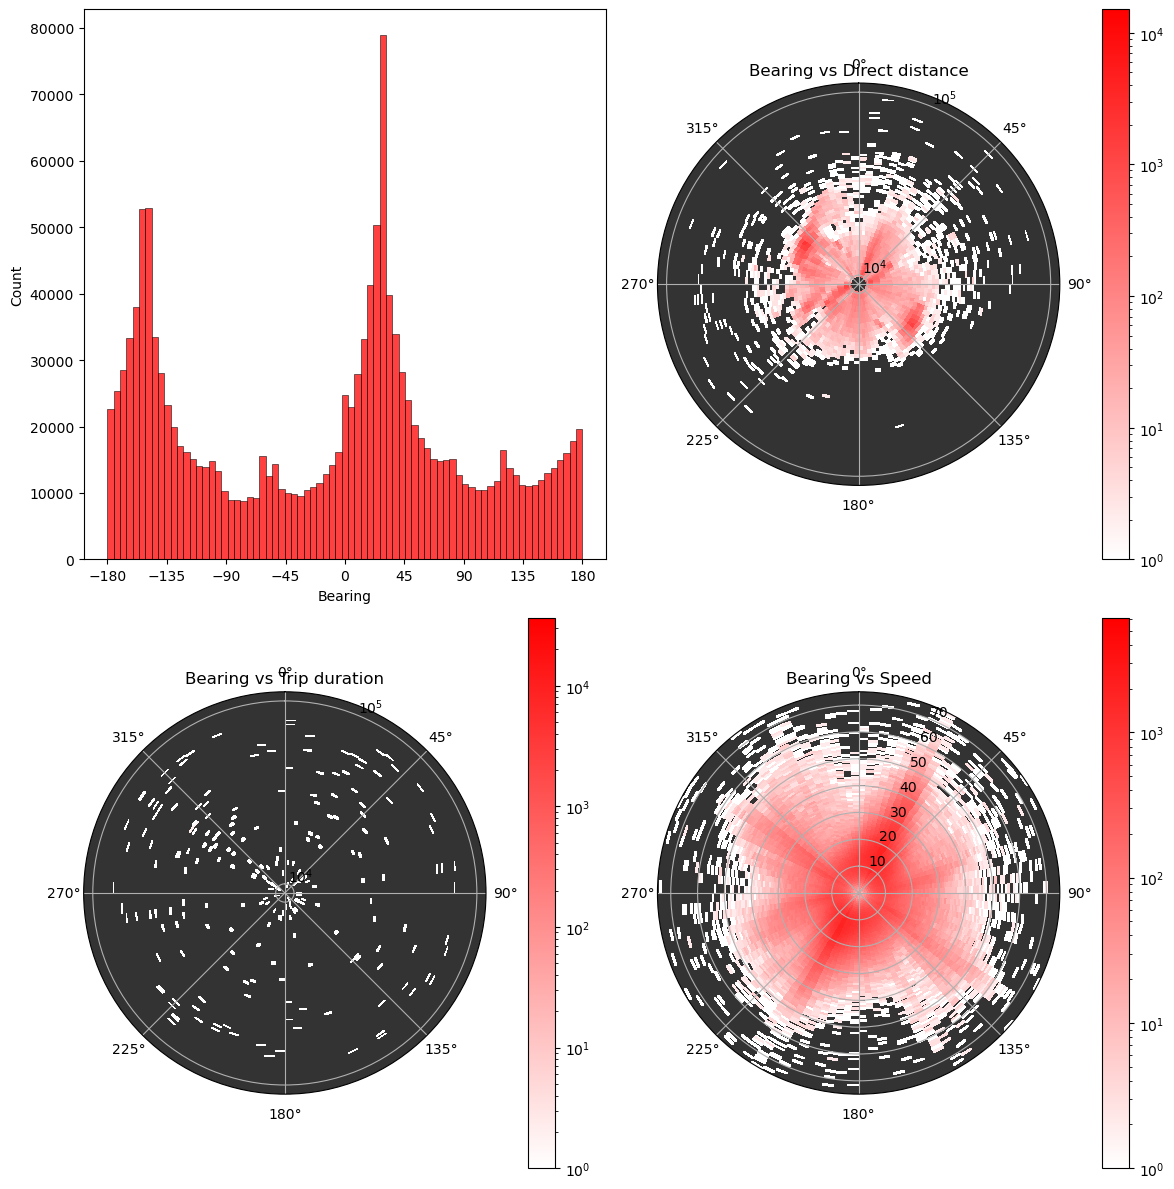

In [29]:
from matplotlib.colors import LogNorm, LinearSegmentedColormap

# 1) make a white→red colormap
white_red = LinearSegmentedColormap.from_list('white_red', ['white','red'], N=256)

def polar_bin2d_strong(ax, theta, r, bins=(100,100),
                       cmap=white_red, r_logscale=False):
    # bin edges
    theta_edges = np.linspace(0, 2*np.pi, bins[0]+1)
    r_max       = r.max()
    r_edges     = np.linspace(0, r_max, bins[1]+1)

    # histogram + mask zeros
    H, _, _ = np.histogram2d(theta, r, bins=[theta_edges, r_edges])
    H = np.ma.masked_where(H==0, H)

    # draw with log‐norm on color, white bins stay background
    mesh = ax.pcolormesh(
        theta_edges, r_edges, H.T,
        cmap=cmap,
        norm=LogNorm(vmin=1, vmax=H.max()),
        shading='auto'
    )

    # optional: darker background so white=empty is visible
    ax.set_facecolor('#333333')  

    if r_logscale:
        ax.set_rscale('log')

    # 0° at top, clockwise, 45° ticks
    ax.set_theta_zero_location('N')
    ax.set_theta_direction(-1)
    ticks = np.deg2rad(np.arange(0, 360, 45))
    ax.set_xticks(ticks)
    ax.set_xticklabels(['0°','45°','90°','135°','180°','225°','270°','315°'])

    return mesh

# wrap bearing from –180…180 to 0…360° (for a proper full circle)
train['bearing_rad'] = np.deg2rad((train['bearing'] + 360) % 360)

# subsets
df1 = train[train['dist'] < 1e5]
df2 = df1.copy()
df3 = train[(train['trip_duration'] < 3600*22) & (train['dist'] < 1e5)]
df4 = train[(train['speed'] < 75) & (train['dist'] < 1e5)]

# —— plotting all four panels ——
fig = plt.figure(figsize=(12,12))

# p1: regular hist
ax1 = plt.subplot(2,2,1)
sns.histplot(df1['bearing'], bins=75, color='red', ax=ax1)
ax1.set_xlabel("Bearing")
ax1.set_xticks(np.arange(-180,181,45))

# p2–p4: polar bin2d with white→red
axes = [
    plt.subplot(2,2,2, projection='polar'),
    plt.subplot(2,2,3, projection='polar'),
    plt.subplot(2,2,4, projection='polar')
]

datasets = [
    (df2['bearing_rad'], df2['dist'],           'Direct distance',   True),
    (df3['bearing_rad'], df3['trip_duration'],  'Trip duration',     True),
    (df4['bearing_rad'], df4['speed'],          'Speed',             False),
]

for ax, (θ, ρ, title, log_r) in zip(axes, datasets):
    mesh = polar_bin2d_strong(ax, θ, ρ, bins=(100,100),
                              cmap=white_red, r_logscale=log_r)
    ax.set_title(f'Bearing vs {title}')
    fig.colorbar(mesh, ax=ax, pad=0.08)

plt.tight_layout()
plt.show()

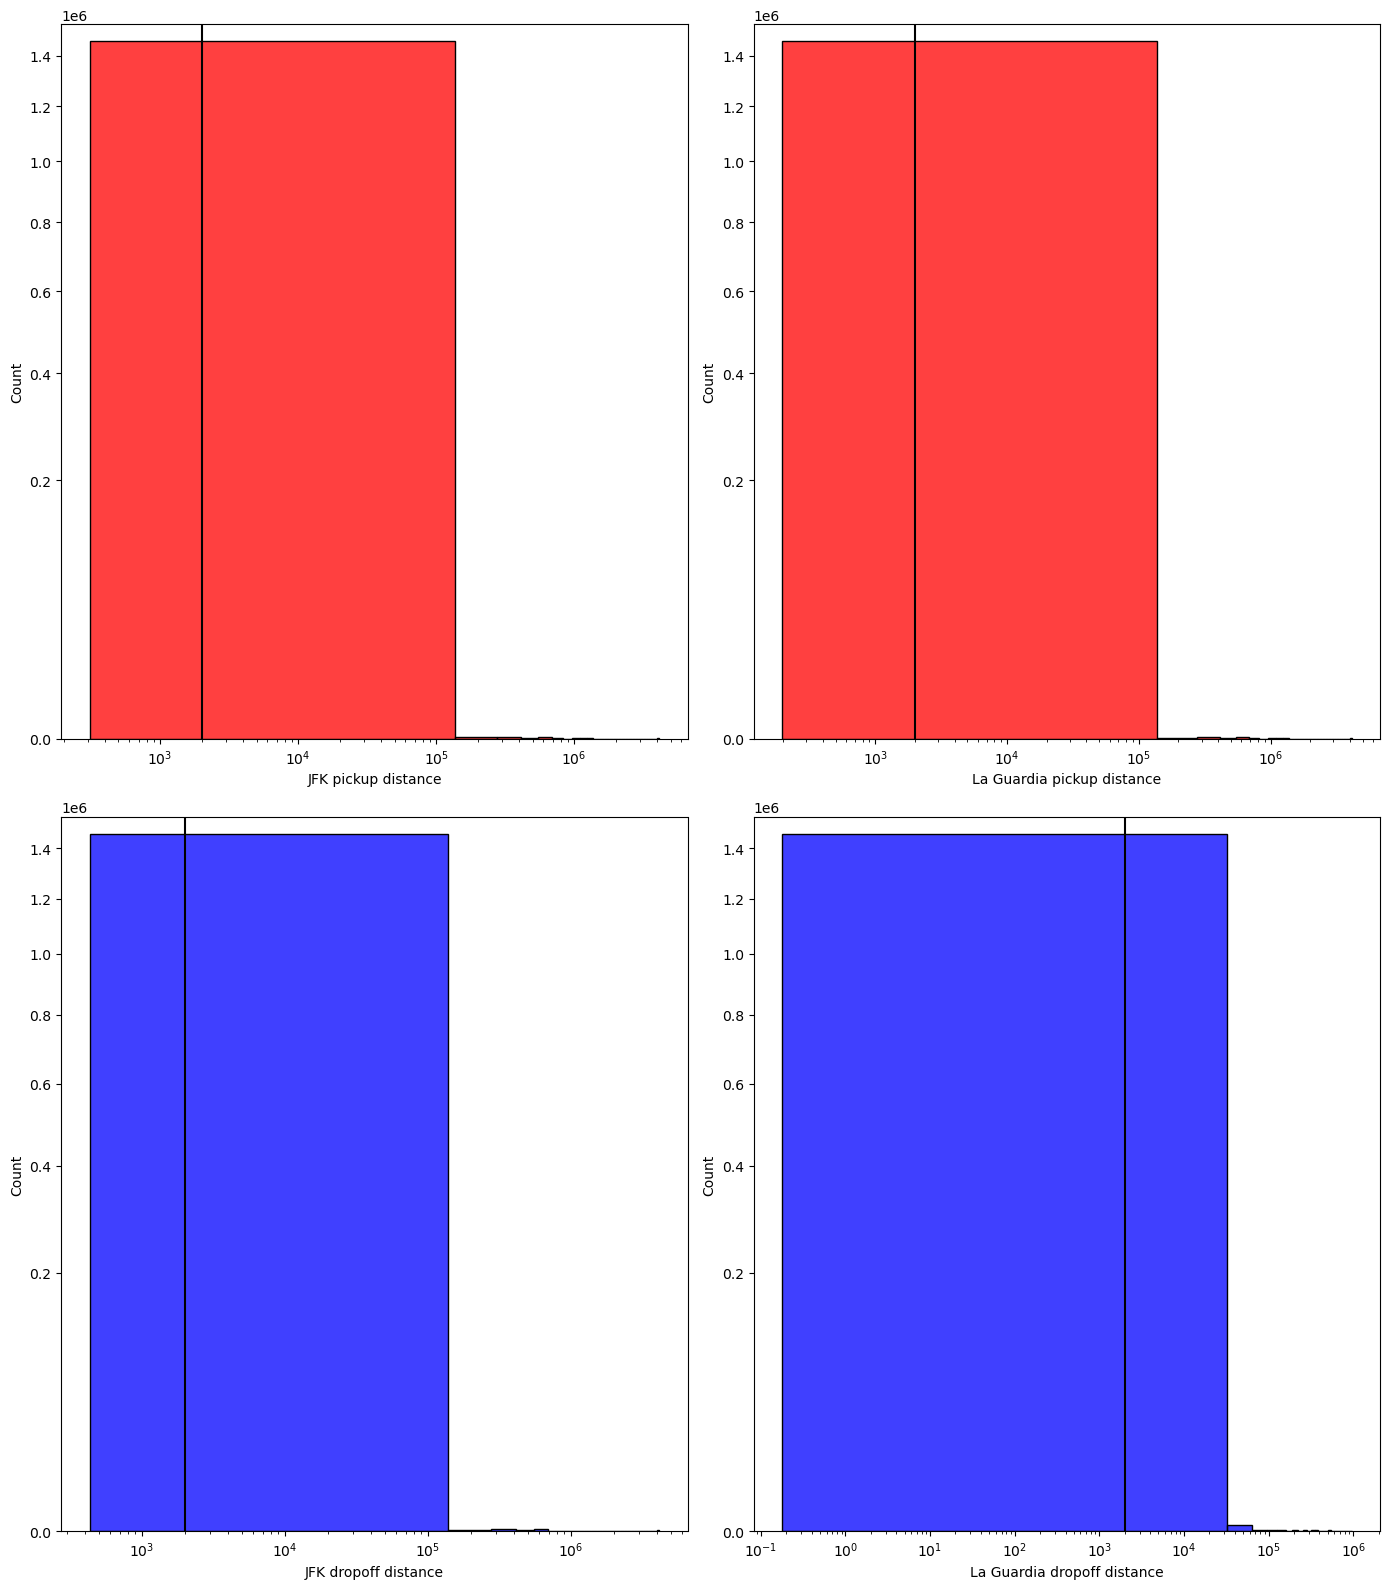

In [30]:
fig, axs = plt.subplots(2, 2, figsize=(14, 16))

# JFK pickup
sns.histplot(train['jfk_dist_pick'], bins=30, color='red', ax=axs[0, 0])
axs[0, 0].set_xscale('log')
axs[0, 0].set_yscale('function', functions=(sqrt_transform, sqrt_inverse))
axs[0, 0].axvline(2000, color='black')
axs[0, 0].set_xlabel("JFK pickup distance")

# JFK dropoff
sns.histplot(train['jfk_dist_drop'], bins=30, color='blue', ax=axs[1, 0])
axs[1, 0].set_xscale('log')
axs[1, 0].set_yscale('function', functions=(sqrt_transform, sqrt_inverse))
axs[1, 0].axvline(2000, color='black')
axs[1, 0].set_xlabel("JFK dropoff distance")

# La Guardia pickup
sns.histplot(train['lg_dist_pick'], bins=30, color='red', ax=axs[0, 1])
axs[0, 1].set_xscale('log')
axs[0, 1].set_yscale('function', functions=(sqrt_transform, sqrt_inverse))
axs[0, 1].axvline(2000, color='black')
axs[0, 1].set_xlabel("La Guardia pickup distance")

# La Guardia dropoff
sns.histplot(train['lg_dist_drop'], bins=30, color='blue', ax=axs[1, 1])
axs[1, 1].set_xscale('log')
axs[1, 1].set_yscale('function', functions=(sqrt_transform, sqrt_inverse))
axs[1, 1].axvline(2000, color='black')
axs[1, 1].set_xlabel("La Guardia dropoff distance")

plt.tight_layout()
plt.show()

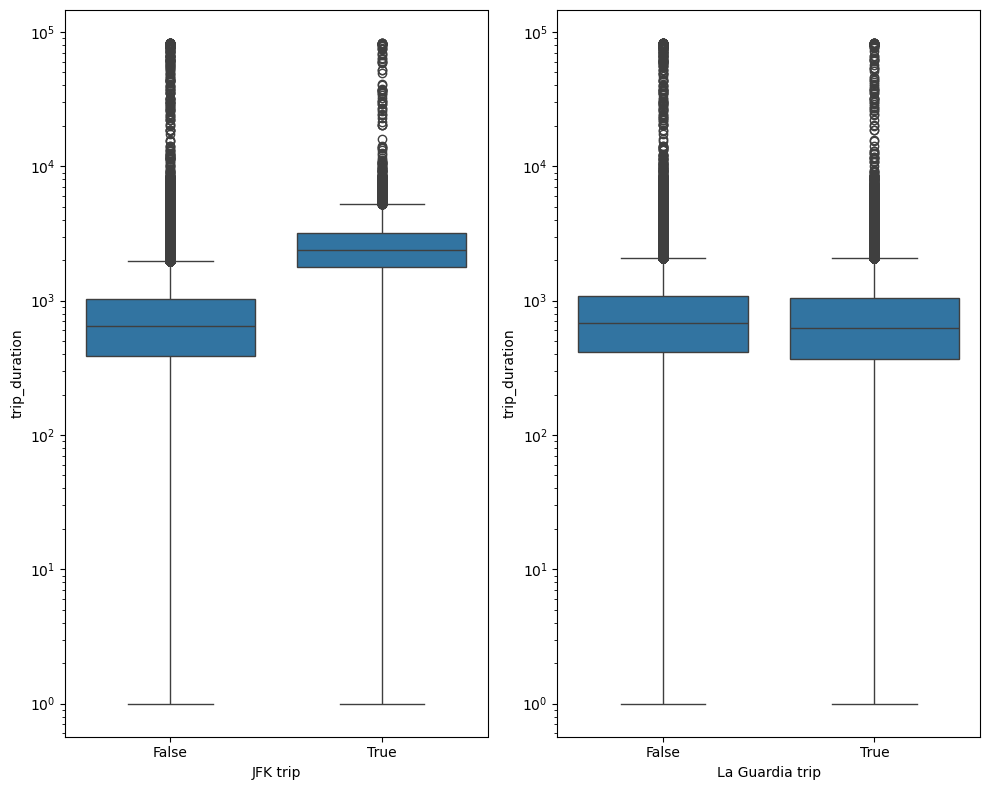

In [31]:
fig, axs = plt.subplots(1, 2, figsize=(10, 8))

# JFK trip
df_jfk = train[train['trip_duration'] < 23*3600]
sns.boxplot(x='jfk_trip', y='trip_duration', data=df_jfk, ax=axs[0])
axs[0].set_yscale('log')
axs[0].set_xlabel("JFK trip")

# La Guardia trip
sns.boxplot(x='lg_trip', y='trip_duration', data=df_jfk, ax=axs[1])
axs[1].set_yscale('log')
axs[1].set_xlabel("La Guardia trip")

plt.tight_layout()
plt.show()

## 5. Data cleaning

## 6. External data